## Udacity Project: Wrangle and Analyze Data

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.


In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

### Gathering Data

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Scrape the imape predictions file programmatically

In [4]:
url = "https://viewf6b31853.udacity-student-workspaces.com/edit/image-predictions-3.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
#Read TSV file
image_prediction = pd.read_csv('image-predictions-3.tsv', sep='\t' )

In [6]:
# Setting up the Twitter API with authentication pieces
consumer_key = 'XNHnEnmzqKv1tHh56oZXlunEI'
consumer_secret = 'M3y5xoMS4BG5wIxiTJ8klh2XwiGOdxbpkY1HOnmlULBmPuqvMy'
access_token = '1101469495560826881-luXYkVT2xXEuukaOp8E9hDCiW062wz'
access_secret = '6gDc4Q1UWXxvDrVd3uc5BDnSF09HhC0dzNG0miGLIIhGC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:

tweet_ids = twitter_archive.tweet_id.values


tweet_data = []
list_of_tweets_found = []
list_of_tweets_not_found = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        list_of_tweets_found.append(tweet_id)
    except:
        list_of_tweets_not_found.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
Rate limit reached. Sleeping for: 742
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 742


In [8]:
print("List of tweets id found0 :",len(list_of_tweets_found))
print("List of tweets id found:",len(list_of_tweets_not_found))

List of tweets id found0 : 2331
List of tweets id found: 25


In [9]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [10]:
# Load the Twitter API data
twitter = pd.read_json('tweet_json.txt')
twitter['tweet_id'] = list_of_tweets_found
twitter = twitter[['tweet_id', 'favorite_count', 'retweet_count']]

In [11]:
twitter.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36082,7684
1,892177421306343426,31124,5682
2,891815181378084864,23433,3768
3,891689557279858688,39364,7853
4,891327558926688256,37603,8451


### Assessing data

In [12]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_archive.text.value_counts()

12/10 good shit Bubka\n@wane15                                                                                                                                          1
13/10 such a good doggo\n@spaghemily                                                                                                                                    1
This is Sophie. She just arrived. Used pawority shipping. Speedy as h*ck delivery. 13/10 would carefully assemble https://t.co/8jOC4zhNxy                               1
This is Penny. She fought a bee and the bee won. 10/10 you're fine Penny, everything's fine https://t.co/zrMVdfFej6                                                     1
This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution https://t.co/etL8FHBrh8                                                    1
This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV               

In [19]:
twitter_archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [20]:
twitter_archive.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [21]:
twitter_archive.retweeted_status_timestamp.value_counts()

2017-02-12 01:04:29 +0000    1
2016-04-29 00:21:01 +0000    1
2016-11-02 23:45:19 +0000    1
2017-01-13 17:00:21 +0000    1
2016-03-24 01:11:29 +0000    1
2017-03-01 18:47:10 +0000    1
2016-12-17 00:38:52 +0000    1
2017-03-11 18:35:42 +0000    1
2017-06-09 16:22:42 +0000    1
2016-10-08 18:41:19 +0000    1
2016-03-21 19:29:52 +0000    1
2017-02-17 03:39:51 +0000    1
2016-11-01 03:00:09 +0000    1
2015-11-19 03:29:07 +0000    1
2015-11-20 03:43:06 +0000    1
2016-07-22 00:43:32 +0000    1
2017-04-01 21:42:03 +0000    1
2016-06-10 00:39:48 +0000    1
2016-08-22 16:06:54 +0000    1
2016-07-13 01:34:21 +0000    1
2016-09-11 21:34:30 +0000    1
2017-03-08 01:41:24 +0000    1
2016-08-15 16:22:20 +0000    1
2016-02-18 02:24:13 +0000    1
2016-08-04 01:03:17 +0000    1
2015-12-08 18:17:56 +0000    1
2017-02-18 01:39:12 +0000    1
2016-09-09 18:31:54 +0000    1
2016-03-07 18:09:06 +0000    1
2016-12-12 16:16:49 +0000    1
                            ..
2015-12-24 16:00:30 +0000    1
2017-03-

In [22]:
sum(image_prediction.jpg_url.duplicated())

66

In [23]:
twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/786233965241827333/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/680055455951884288/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [24]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
an             7
Daisy          7
Bailey         7
Toby           7
Koda           6
Rusty          6
Jack           6
Milo           6
Dave           6
Leo            6
Bella          6
Stanley        6
Scout          6
Jax            6
Oscar          6
Oakley         5
            ... 
Adele          1
Jangle         1
Jazz           1
Horace         1
Jeremy         1
Alejandro      1
Jomathan       1
Tilly          1
Flash          1
Trevith        1
Zara           1
Brady          1
Batdog         1
Jerome         1
Kallie         1
Coleman        1
Storkson       1
Strider        1
Maya           1
Lucia          1
Tayzie         1
Burt           1
Ike            1
Corey          1
Finnegus       1
Ralf           1
Kona           1
Kane          

In [26]:
image_prediction.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
1092,719551379208073216,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1,malamute,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian_greyhound,0.193869,True,bluetick,0.160380,True,standard_poodle,0.125982,True
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True


In [27]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_prediction.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [29]:
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                       

In [30]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [32]:
image_prediction.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [33]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
chow                               20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [35]:
image_prediction.p2_conf.value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [36]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [38]:
image_prediction.p3_conf.value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [39]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [40]:
twitter.sample(10)

,tweet_id,favorite_count,retweet_count
1003,746056683365994496,3533,808
2222,667873844930215936,601,384
283,837471256429613056,12770,2267
2235,667550882905632768,0,32
1775,676975532580409345,2722,1045
1199,714251586676113411,3242,827
2028,671485057807351808,731,223
1157,719332531645071360,3387,940
1986,672245253877968896,659,147
1334,703382836347330562,3487,1137


In [41]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [42]:
twitter.tweet_id.value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
670093938074779648    1
756651752796094464    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
759923798737051648    1
685315239903100929    1
818259473185828864    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [43]:
twitter.favorite_count.value_counts()

0        163
1886       4
1944       3
4906       3
234        3
3157       3
1256       3
496        3
1061       3
2409       3
7224       3
318        3
2452       3
723        3
3865       3
3386       3
1473       3
2228       2
2200       2
2204       2
161        2
3815       2
8361       2
14546      2
9984       2
225        2
2318       2
4377       2
1750       2
4237       2
        ... 
6616       1
3810       1
423        1
6520       1
8593       1
27002      1
379        1
8573       1
8575       1
2432       1
10482      1
2434       1
10630      1
2444       1
9214       1
21967      1
31124      1
14758      1
8597       1
3812       1
2456       1
409        1
550        1
31132      1
778        1
6558       1
415        1
13596      1
4517       1
2020       1
Name: favorite_count, Length: 1983, dtype: int64

In [44]:
twitter.retweet_count.value_counts()

225      6
1144     5
1160     5
143      5
919      4
734      4
555      4
551      4
523      4
621      4
519      4
629      4
42       4
224      4
367      4
456      4
1306     4
341      4
53       4
2895     4
2357     4
474      4
1460     3
380      3
1271     3
965      3
570      3
541      3
481      3
128      3
        ..
2442     1
397      1
401      1
4509     1
415      1
2466     1
425      1
6572     1
369      1
10606    1
363      1
361      1
90       1
313      1
2362     1
315      1
321      1
2370     1
2384     1
337      1
339      1
658      1
343      1
345      1
4443     1
4445     1
2398     1
4449     1
359      1
10241    1
Name: retweet_count, Length: 1678, dtype: int64

### Quality Issues

Completeness, validity, accuracy, consistency (content issues)
#### Tidiness Issues
1. Merge the clean versions of dataframes 
2. Correct the dog types.


#### Quality Issues
1. Remove Retweets from our data.
2. Delete columns that no longer needed
3. Change 'tweet_id' from an integer to a string
4. Change the timestamp to correct datetime format
5. Issues with names correcting them.
6. Dog ratings inaccurate
7. Unstandardized ratings
8. Some breeds in p1, p2, and p3 (Image Prediction File) have upper cases (first letter),changing all in lowercase.
9. Some tweets don't include images

### Cleaning Data

In [45]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = twitter.copy()

In [46]:
from functools import reduce
data = [twitter_archive_clean,image_prediction_clean, tweet_json_clean]
twitter_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), data)

In [47]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36082,7684
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31124,5682
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23433,3768
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39364,7853
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37603,8451


In [48]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

**Define**

Create one column for the various dog types: doggo, floofer, pupper, puppo.
Extract the dog types from the 'text' column into the new 'dog_type' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".

**Code**

In [49]:
twitter_dogs['dog_type'] = twitter_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [50]:
twitter_dogs[['dog_type','doggo', 'floofer', 'pupper', 'puppo']].head()

,dog_type,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [51]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_dogs = twitter_dogs.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [52]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                        2059 

**Quality Issue 1: Remove Retweets**

**Code**

In [53]:
twitter_dogs = twitter_dogs[np.isnan(twitter_dogs.retweeted_status_id)]

**Test**

In [54]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
jpg_url                       1987 non-null object
img_num                       1987 non-null int64
p1                            1987 non-null object
p1_conf                       1987 non-null float64
p1_dog                        1987 non

**Quality Issue 2: Delete columns that no longer needed**

**Code**

In [55]:
twitter_dogs = twitter_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**Test**

In [56]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,36082,7684,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31124,5682,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,23433,3768,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39364,7853,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37603,8451,NaN


**Quality Issue 3: Change 'tweet_id' from an integer to a string**

**Code**

In [57]:
twitter_dogs['tweet_id'] = twitter_dogs['tweet_id'].astype(str)

**Test**

In [58]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf                  1

**Quality Issue 4: Change the timestamp to correct datetime format**

**Code**

In [59]:
twitter_dogs['timestamp'] = twitter_dogs['timestamp'].str.slice(start=0, stop=-6)

In [60]:
twitter_dogs['timestamp'] = pd.to_datetime(twitter_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

**Test**

In [61]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf           

**Quality Issue 5:Issues with names correcting them**

**Code**


In [62]:
twitter_dogs.name = twitter_dogs.name.str.replace('^[a-z]+', 'None')

**Test**

In [63]:
twitter_dogs.name.value_counts()

None        644
Oliver       10
Charlie      10
Cooper       10
Tucker        9
Penny         9
Lucy          9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Bo            6
Bella         6
Stanley       6
Jax           6
Koda          6
Chester       5
Leo           5
Dave          5
Oscar         5
Scout         5
Bailey        5
Rusty         5
Louis         5
Buddy         5
Milo          5
Phil          4
Archie        4
Scooter       4
           ... 
Carter        1
Shawwn        1
Mutt          1
Lulu          1
Brandi        1
Coleman       1
Kallie        1
Jerome        1
Tom           1
Leela         1
Dobby         1
Julius        1
Roscoe        1
Hermione      1
Biden         1
Baloo         1
Bronte        1
Happy         1
Geoff         1
Batdog        1
Snicku        1
Jareld        1
Vinscent      1
Skye          1
Vince         1
Trevith       1
Zara          1
Brady         1
Logan         1
O             1
Name: name, Length: 912,

In [64]:
twitter_dogs.name.sample(20)

287      Doobert
1127        None
1620         Ava
8           Zoey
1250       Edgar
429         None
1079    Finnegus
1515        None
1537        None
1050      Walker
977         None
166       Sailor
769         None
1889      Bernie
1429       Sadie
131      Lorenzo
1497        None
1214        None
256       Willow
2001        Dave
Name: name, dtype: object

**Quality Issue 6: Dog ratings inaccurate**

**Code**

In [65]:
import re
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())


In [66]:
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [67]:
ratings_with_decimals_index

[40, 548, 603, 1438]

In [68]:
twitter_dogs.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter_dogs.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter_dogs.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter_dogs.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

**Test**

In [69]:
twitter_dogs.loc[40]

tweet_id                                                883482846933004288
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-08 00:28:19
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Bella. She hopes her smile made you sm...
expanded_urls            https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      13.5
rating_denominator                                                      10
name                                                                 Bella
jpg_url                    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                                  1
p1                                                        golden_retriever
p1_conf                  

**Quality Issue 7: Unstandardized ratings**

**Code**

In [70]:
twitter_dogs['rating'] = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']

**Test**

In [71]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,bagel,0.085851,False,banana,0.076110,False,36082,7684,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,31124,5682,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,23433,3768,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,39364,7853,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37603,8451,NaN,1.2


In [72]:
twitter_dogs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'dog_type', 'rating'],
      dtype='object')

In [73]:
twitter_dogs.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

#### Quality Issue 8:Some breeds in p1, p2, and p3 (Image Prediction File) have upper cases (first letter).

**Code**

In [74]:
twitter_dogs['p1'] = twitter_dogs['p1'].str.lower()
twitter_dogs['p2'] = twitter_dogs['p2'].str.lower()
twitter_dogs['p3'] = twitter_dogs['p3'].str.lower()

**Test**

In [75]:
twitter_dogs.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
140,858843525470990336,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,None,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,golden_retriever,0.578120,...,labrador_retriever,0.286059,True,bloodhound,0.026917,True,14988,3309,puppo,1.3
1402,682303737705140231,2015-12-30 20:54:22,This is Todo. He's screaming because he doesn'...,https://twitter.com/dog_rates/status/682303737...,9.0,10,Todo,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,seat_belt,0.997659,...,lakeland_terrier,0.001731,True,airedale,0.000204,True,3037,962,NaN,0.9
59,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/87941...,english_springer,0.383404,...,boston_bull,0.134967,True,cardigan,0.110481,True,98954,40501,NaN,1.3
1808,670691627984359425,2015-11-28 19:51:59,This is Ester. He has a cocaine problem. This ...,https://twitter.com/dog_rates/status/670691627...,8.0,10,Ester,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,shetland_sheepdog,0.071124,...,home_theater,0.068398,False,american_staffordshire_terrier,0.066964,True,569,231,NaN,0.8
805,748324050481647620,2016-06-30 01:15:31,This is Duke. He permanently looks like he jus...,https://twitter.com/dog_rates/status/748324050...,11.0,10,Duke,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,shetland_sheepdog,0.880499,...,collie,0.107901,True,pembroke,0.003607,True,3672,756,NaN,1.1


#### Quality Issue 9:  Some tweets don't include images
Remove all tweets that don't include any image.

**Code**

In [76]:
twitter_dogs = twitter_dogs.dropna(subset=['expanded_urls'])

**Test**

In [77]:
twitter_dogs['expanded_urls'].isnull().value_counts()

False    1987
Name: expanded_urls, dtype: int64

### Storing, Analyzing & Visualizing Data

In [78]:
twitter_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

Text(0.5,6.8,'Retweet Count')

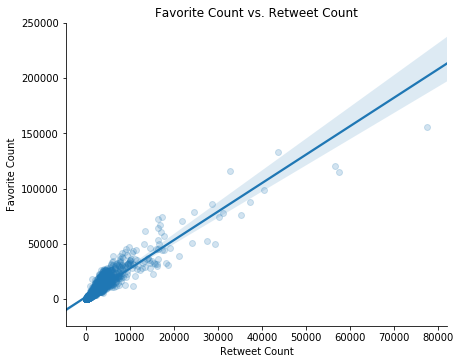

In [79]:
import seaborn as sns
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", y="favorite_count", data=twitter_dogs,size = 5,aspect=1.3,scatter_kws={'alpha':1/5})
plt.title('Favorite Count vs. Retweet Count')
plt.ylabel('Favorite Count')
plt.xlabel('Retweet Count')

**What is the most popular dog?**

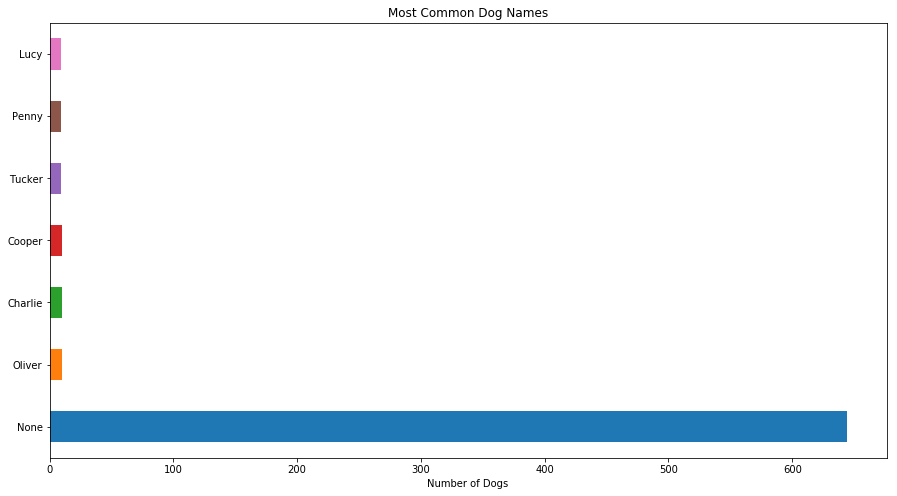

In [80]:
twitter_dogs.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

Text(0.5,1,'Retweet Counts by Ratings Scatter Plot')

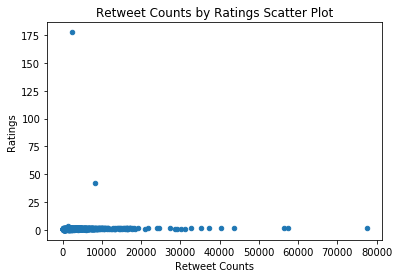

In [81]:
twitter_dogs.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

The highest ratings do not receive the most retweets.

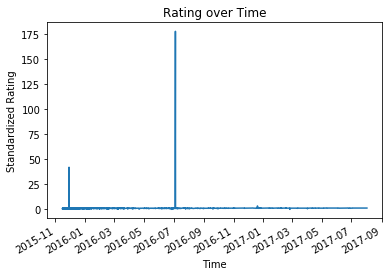

In [82]:
# Plot standardized ratings over time
twitter_dogs.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [83]:
twitter_dogs.loc[twitter_dogs['rating'] > 2]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
406,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,...,tibetan_mastiff,0.036708,True,labrador_retriever,0.025823,True,5424,1464,NaN,3.428571
789,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,...,sunglasses,0.080822,False,sunglass,0.050776,False,5115,2466,NaN,177.600000
1781,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,...,accordion,0.094075,False,drumstick,0.061113,False,23675,8292,NaN,42.000000


The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix. If we were required to fix all problems then thix tweet could be removed but I will ignore in this case. The other 2 tweets are accurate ratings that are jokes. I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

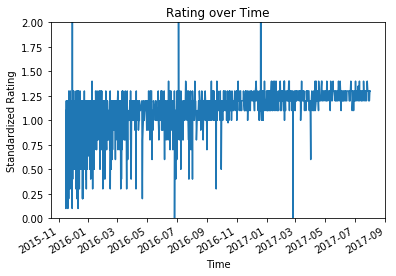

In [84]:
# Plot standardized ratings over time with ylim of 0-2
twitter_dogs.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there many ratings below 1, while after that time there are barely any.

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act .ipynb'])

255